# MNIST Dataset recognition using the binv formula

This is code is our implentation of using the Extreme Machine Learning for the MNIST dataset recognition.
The example is taken from the [Learning the Pseudoinverse Solution to Network Weights Arrticle](https://arxiv.org/abs/1207.3368) [1].


### References
1.  J. Tapson, A. v. S. Learning the pseudoinverse solution to network weights [Text] / A. v. S. J. Tapson // Neural Networks. — 2013. — Т. 45. — С. 94—100.
@article{tapson-digits,
	title={Learning the pseudoinverse solution to network weights},
	author={J. Tapson, A. van Schaik},
	journal={Neural Networks},
	volume={45},
	pages={94--100},
	year={2013}
}  


The structure of the network we use: 

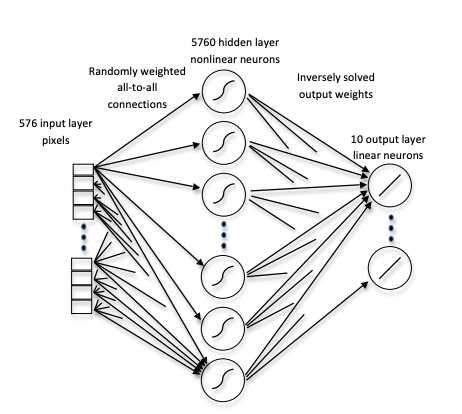

In [2]:
from IPython.display import Image

Image(filename="../imgs/RBF_Neuaral_Net_ TapsonArticle.png")

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

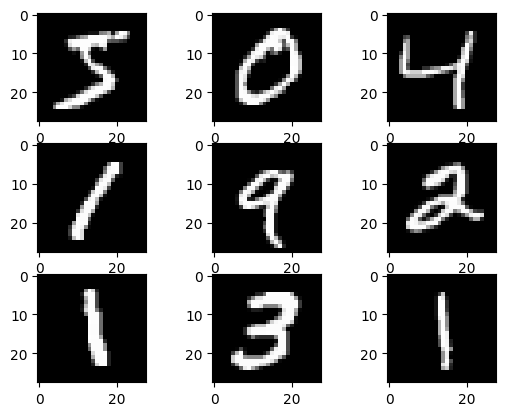

In [ ]:
# load dataset
(x_data, y_data), (testX, testy) = mnist.load_data()

# draw some test pictures
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_data[i], cmap=plt.get_cmap("gray"))
plt.show()

In [ ]:
# get some amount of training data
def get_trainXY(tr_size: int):
    trainX = x_data[0:tr_size]
    train_y = y_data[0:tr_size]

    # convert the image matrix to a vector
    trainX_vectors = [image_matrix.ravel() for image_matrix in trainX]

    # form the train output: it is an array (length 10) which consists of {0 1}
    # and the index of 1 defines the number corresponding to the image
    trainy = []
    for y in train_y:
        val = np.zeros(10)
        val.put(y, 1)
        trainy.append(val)
    return trainX_vectors, trainy


# define neural net and train it
(trainX, trainY) = get_trainXY(60_000)

In [ ]:
# Train rbf with BINV
from RadialBasisNet import RBF
from Method import Method

nn = RBF(28 * 28, 28 * 28 * 10, 10)
# nn.train(trainX, trainY)
print("Net has been trained!")

Choose device: cpu
Net has been trained!


In [ ]:
# test it
success: int = 0
for i in range(testy.size):
    res = nn.feedforward(testX[i].ravel())
    answer = np.where(res == max(res))
    if answer == testy[i]:
        success += 1

percent = success / testy.size * 100
print("Success recognized images: ", percent, "%")

### Results
* For the traininig set which consists only from **785** rows of data precision is about **86-89%**!
* For the training set which consists from **60_000** rows of data precision is about **95-99%**!  

## Comparasion between BinvRBF and PinvRBF training time

In [ ]:
import time
from RadialBasisNet import RBF
from Method import Method

trainings_amount = 10
binvRbf_times = []
pinvRbf_times = []

binvRBF = RBF(28 * 28, 28 * 28 * 10, 10)
pinvRBF = RBF(28 * 28, 28 * 28 * 10, 10)


trainX, trainY = get_trainXY(5000)
print(len(trainX))
print(len(trainX[0]))

print("Start")
for i in range(0, trainings_amount):
    print("iteration: " + str(i))

    start = time.time()
    binvRBF.train(trainX, trainY)
    end = time.time()
    print(end - start)
    binvRbf_times.append(end - start)

    # using standard pinv
    start = time.time()
    pinvRBF.train(trainX, trainY, Method.PINV)
    end = time.time()
    print(end - start)
    pinvRbf_times.append(end - start)

5000
784
Start
iteration: 0


/Users/trofimovep/Projects/DataScienceProjects/private-science/mnist/RadialBasisNet.py:50: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


35.91118884086609
125.7185709476471
iteration: 1
39.37448310852051
139.12492489814758
iteration: 2
31.971699953079224
99.28082299232483
iteration: 3
32.28065204620361
122.20653700828552
iteration: 4
48.11367082595825
125.51926493644714
iteration: 5
38.67329978942871
126.737144947052
iteration: 6
35.84801411628723
114.041748046875
iteration: 7
35.986347913742065
114.6307110786438
iteration: 8
31.57379412651062
106.11037492752075
iteration: 9
31.757163047790527
106.26736903190613


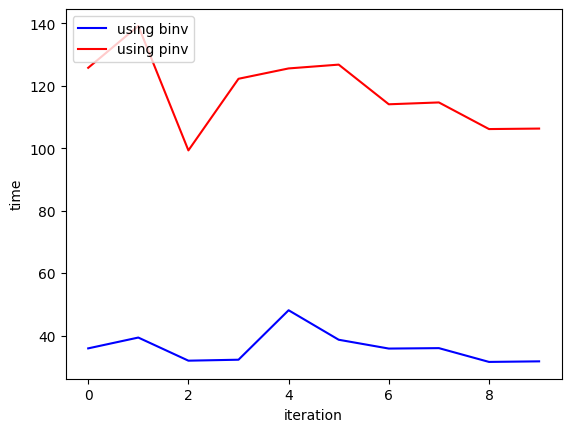

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(trainings_amount), binvRbf_times, "-b", label="using binv")
plt.plot(range(trainings_amount), pinvRbf_times, "-r", label="using pinv")
plt.legend(loc="upper left")
plt.xlabel("iteration")
plt.ylabel("time")
plt.show()